<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://d8a-88.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 12pt;"><strong>Economic Models</strong>, Fall 2019<br>
            Dr. Eric Van Dusen</p></td></tr>
</table>

# Lab 7: Production and Cobb-Douglas Functions in Macroeconomics

In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
#import nbinteract as nbi
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("seaborn-muted")

We would like to thank Professor Raymond Hawkins for his input, and Lecture 4 of his Economics 100B course at UC Berkeley, which informed parts of this notebook.

### Production in the Economy

At the core of macroeconomics is the study of how a nation's various resources are used as inputs in the production of goods and services. The aggregate value of what a nation produces is known as its Gross Domestic Product, which is calculated in many different ways. The focus of this lecture is on production and the functions that aim to model how much output a country can produce, when given a certain set of inputs. 

These set of inputs are known as factors of production:
- K: Capital - a monetary value of the stock or value of productive assets.
- L: Labor - the number of worker hours.
- A: Total Factor Productivity - a measure of the effectiveness with which the two factors of production are used.

This model of production in an economy provides a simple yet effective way of modeling output. It would be way too complicated to account for every possible input to production, especially as we are operating at the country level. However, the key simplication is that we can classify all of these different inputs as either capital or labor: anything physical or tangible is capital and any work done by humans is labor. Taking the monetary value of either of these, while a rough approximation, still yields great insight into the different ways countries produce goods and services. Even if two countries have very similar GDPs, one maybe more capital intensive than the other. Having this knowledge would greatly inform policy and would help governments direct funding towards areas of concern.

We will see this in action during Project 1 where we will examine real life data from different countries and compare/contrast their usage of labor, capital and total factor productivity.

This simplication has allowed economists to derive the following key notion:
A nation's output is a function of the amount of the factors of production that are utilized in its economy; that is to say output is a function of labor and capital.

Thus, the economy's production function is: $$Y = A \cdot f(K, L)$$

$f(K, L)$ refers to any specific mathematical model of output. One such example is the Cobb-Douglas production function that we will be examining later.

### Total Factor Productivity (TFP)

In modern economies, one way to think about TFP is technology or research and development. A country with a high TFP (or technology) can produce far more goods and services than another with a lower TFP but a similar amount of capital and labor. Think about it - a country with 5 factories utilizing robotic arms to assemble cars will be able to produce more than another nation that also has 5 factories but utilizes workers working in 8-hour shifts. The former country would have a higher TFP than the latter. Thus, it can be said that technology increases the efficiency with which the factors of production are used.

There are three key differences between TFP and the other two factors of production:
1. TFP "scales" production by some factor A. The other two are raised to an exponent that is less than 1, reducing its value relative to the input. Thus, TFP is very powerful as it creates a proportional increase in output.
2. Technology is "non-rivalrous", meaning that more than one person can use it at any given time. For example, robotics technology is not limited to one person, but a specific robotic arm can only be used by a single person at a time.
3. Technology is "non-excludable", meaning that one person cannot block another from using that factor. Even with the patent system, after expiry, technologies that were once protected now becomes free to use or adapt.

Note that TFP has no intrinsic value by itself, but becomes informative when it is compared across nations. For example, a TFP of 1.4 means nothing. However, if one country has a TFP of 1.8 while the other is 1.4, then we can say that the first country is more effective at utilizing its resources to produce output.

### The Cobb-Douglas Production Function

The Cobb-Douglas Production Function is as follows:
$$
f(K, L) = K^\alpha L^\beta \\
\Rightarrow Y = A \cdot f(K, L) = A K^\alpha L^\beta
$$
Where $\alpha$ and $\beta$ are exponents.

A common simplification is that $\beta = 1 - \alpha$. We will later explore the implications of this statement. For now, let us rewrite the above function:

$$
Y = A K^\alpha L^{1 - \alpha}
$$

Note that this is a function of two variables, $K$ and $L$. If we were to plot this function utilizing both variables, we would need a 3D plot with $K$, $L$ and $Y$ each having their own axis. For now, let us gain greater insight of what this function will look like by holding one variable constant and plot the other versus output.

For the first case, let us visualize the Cobb-Douglas Production Function with output as a function of capital, holding the amount of labor constant at $\bar L$.

### Capital

In [2]:
def cobb_douglas(A, K, L, alpha, beta = None):
    if beta:
        return A * (K ** alpha) * (L ** beta)
    else:
        return A * (K ** alpha) * (L ** (1 - alpha))

In [3]:
K_s = np.arange(0.001, 1, 0.01)
A = 1
L_bar = 0.5
alpha = 0.4
V_1 = cobb_douglas(A, K_s, L_bar, alpha)

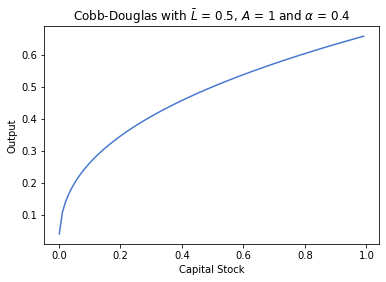

In [4]:
plt.plot(K_s, V_1)
plt.title(fr"Cobb-Douglas with $\bar L$ = {L_bar}, $A$ = {A} and $\alpha$ = {alpha}")
plt.xlabel("Capital Stock")
plt.ylabel("Output")
plt.show()

Notice some of the properties of the function above:
1. It is increasing. This is called increasing returns to capital wherein any increase in capital will lead to an increase in output, assuming that labor is held constant.
2. It is concave (increasing at a decreasing rate). This is called diminishing marginal returns to capital wherein any additional unit of capital will lead to smaller and smaller increases in capital. For a better idea of this, let us take the partial derivative of the Cobb-Douglas function with respect to Capital.

$$
Y = A K^\alpha L^{1 - \alpha} \\
MPK = \dfrac{\partial Y}{\partial K} = \alpha A \left ( \dfrac{L}{K} \right )^{1 - \alpha} 
$$

This function is called the Marginal Product of Capital or MPK. Let us plot this function, once again holding labor constant at $\bar L$.

In [5]:
def MPK(A, K, L, alpha):
    return A * alpha * (K ** (alpha - 1)) * (L ** (1 - alpha))

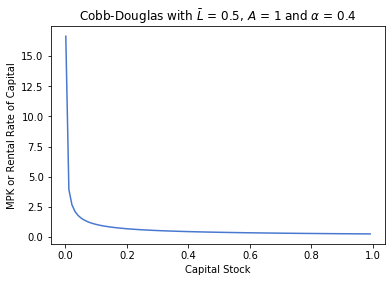

In [6]:
V_2 = MPK(A, K_s, L_bar, alpha)
plt.plot(K_s, V_2)
plt.title(fr"Cobb-Douglas with $\bar L$ = {L_bar}, $A$ = {A} and $\alpha$ = {alpha}")
plt.xlabel("Capital Stock")
plt.ylabel("MPK or Rental Rate of Capital")
plt.show()

Note that MPK is also known as the rental rate of capital - the cost of purchasing or renting an additional unit of capital.

The MPK function is monotonically decreasing, converging towards an asymptote at $\text{MPK} = 0$. This means that the rate of increase of output due to an increase in capital will become 0, meaning that the amount of output added per unit of additional capital will become constant. What would be the intuition behind this?

Say a company making pizzas has 1 oven and 10 employees. There is a hard limit on how many pizzas can be baked in a given period of time. However, if the company purchases a second oven, suddenly the employees can bake more pizzas at the same time, thereby increasing the number that can be baked in the same amount of time. In this case, the MPK would be very high as output has greatly increased just by addding slightly to the company's capital stock. 

Let us move to the case when the company has 100 ovens and 10 employees. Adding another oven would do little to increase output as the 10 employees can only do so much - the extra capacity would not be helpful. In this case, the MPK would be very low as output has not increased by much (if at all) even when the company's capital stock increased.

We will now move to using the Cobb-Douglas function for output as a function of labor, holding the amount of capital constant at $\bar K$.

### Labor

In [7]:
L_s = np.arange(0.001, 1, 0.01)
A = 1
K_bar = 0.5
alpha = 0.4
V_3 = cobb_douglas(A, K_bar, L_s, alpha)

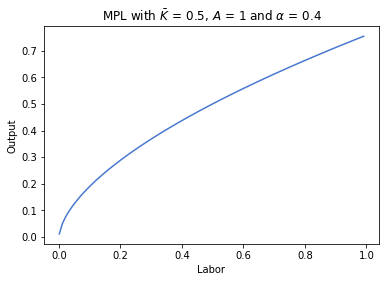

In [8]:
plt.plot(L_s, V_3)
plt.title(fr"MPL with $\bar K$ = {K_bar}, $A$ = {A} and $\alpha$ = {alpha}")
plt.xlabel("Labor")
plt.ylabel("Output")
plt.show()

The properties of the Labor function are similar to that of the capital function. Let us take the partial derivative of the Cobb-Douglas function with respect to Labor.

$$
Y = A K^\alpha L^{1 - \alpha} \\
MPL = \dfrac{\partial Y}{\partial L} = A (1 - \alpha) \left ( \dfrac{K}{L} \right )^{\alpha}
$$

This function is called the Marginal Product of Labor or MPL. Let us plot this function, once again holding capital constant at $\bar K$.

In [9]:
def MPL(A, K, L, alpha):
    return A * (1 - alpha) * (K / L) ** alpha

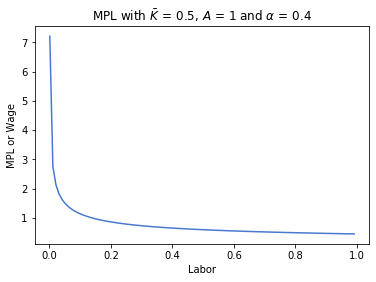

In [10]:
V_4 = MPL(A, K_bar, L_s, alpha)
plt.plot(L_s, V_4)
plt.title(fr"MPL with $\bar K$ = {K_bar}, $A$ = {A} and $\alpha$ = {alpha}")
plt.xlabel("Labor")
plt.ylabel("MPL or Wage")
plt.show()

Note that the MPL is the Real Wage rate - the cost of hiring an additional unit of labor.

Similar to the MPK function, the MPL function is monotonically decreasing, converging towards an asymptote at $\text{MPL} = 0$. This means that the rate of increase of output due to an increase in labor will become 0.

Say the same company making pizzas has 5 ovens and 5 employees. One oven per employee seems like overkill but provides significant extra capacity in terms of capital that would give great flexibility for the company when producing pizzas. However, if the company hires 1 more worker, each oven can be utilized more effectively, as another employee can go to prepping pizzas before baking. This greatly increasies the number of pizzas baked in a given unit of time. The MPL would be very high as output increases significantly with the addition of one more worker. On the above graph, we would be on the steep part of the function.

If the company has 5 ovens but 20 employees, hiring an additional worker would do little to increase output. The kitchen would probably be too crowded and there are only so many servers needed. The MPL would be very low as output has not increased by much even when the company's amount of labor has increased. We would be near the flat part of the graph, as the MPL approaches 0.

### Implications for cross-country comparisons

Work by Professors C.W. Cobb and P.H. Douglas found that production or output was a weighted average of the log of capital and labor. The equation for Cobb-Douglas production functions were the result of their research, especially when a log transformation was applied to the equation:

$$
Y = A K^\alpha L^{1 - \alpha} \\
\ln(Y) = \ln(A) + \alpha \ln(K) + (1 - \alpha) \ln(L)
$$

Note that this is exactly the weighted average that the two Professors found in their empirical findings: capital and labor are weighted by $\alpha$ and $1 - \alpha$ respectively. However, this is still showing production as a function of two variables, $K$ and $L$. Rearranging the equation yields something interesting:

$$
\ln(Y) = \ln(A) + \alpha \ln(K) + \ln(L) - \alpha \ln(L) \\
\ln(Y)- \ln(L) = \ln(A) + \alpha \left ( \ln(K) - \ln(L) \right ) \\
\ln \left ( \dfrac{Y}{L} \right ) = \ln(A) + \alpha \ln \left ( \dfrac{K}{L} \right )
$$

The Cobb-Douglas function is now an equation in 1 variable: $\ln \left ( \dfrac{K}{L} \right )$. This provides a pathway for comparing values of $A$ and $\alpha$ across countries, and by extension how capital and labor are deployed in different ways between nations. We will now learn about the significance of $A$ and $\alpha$ in the sections below. Project 1 will have you try this on a broad range of nations from 1990 to 2017. 

### Shifts in $A$ and its effect on output

In [11]:
def plot_cobb_douglas(V, orig_V):
    data = [go.Surface(z = V, contours = go.surface.Contours(z = go.surface.contours.Z(show = False, project = dict(z = True))),
                      colorscale = "Electric", showscale = False),
           go.Surface(z = orig_V, contours = go.surface.Contours(z = go.surface.contours.Z(show = False, project = dict(z = True))),
                     colorscale = "Viridis", showscale = False)]
    layout = go.Layout(title = "Cobb-Douglas Production Function", autosize=False, width=500, height=500, margin = dict(l = 65, r = 50, b = 65, t = 90),
                       scene = dict(xaxis = dict(title = 'K'), yaxis = dict(title = 'L'), zaxis = dict(title = 'Y')))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
def orig_cobb_douglas():
    L_s = np.arange(0, 10.11, 0.1)
    K_s = np.arange(0, 10.11, 0.1)
    A = 1
    alpha = 0.3
    xx, yy = np.meshgrid(K_s, L_s)
    curr_V = cobb_douglas(A, xx, yy, alpha)
    return curr_V

In [12]:
def change_A(A):
    L_s = np.arange(0, 10.11, 0.1)
    K_s = np.arange(0, 10.11, 0.1)
    alpha = 0.3
    xx, yy = np.meshgrid(K_s, L_s)
    curr_V = cobb_douglas(A, xx, yy, alpha)
    plot_cobb_douglas(curr_V, orig_cobb_douglas())
    

A_slider = widgets.FloatSlider(min = 0.5, max = 10, step = 0.5, value = 1)
display(widgets.interactive(change_A, A = A_slider))

interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=0.5, step=0.5), Output()), _dom_cl…

Supply or total factor productivity shocks could cause $A$ to change. These occur if there is a change in total output for a given level of capital and labor. Examples of these include financial crises, technology shocks, natural environment/distasters and energy prices. 

Favorable shocks rotate the production function upward through an increase in A. Thus, each unit of input from capital and labor now simulataneously produce more output. What does this mean for the rental rate of capital and the real wage? Recall the functions for both of them:

$$
MPL = \dfrac{\partial Y}{\partial L} = A (1 - \alpha) \left ( \dfrac{K}{L} \right )^{\alpha} \\
MPK = \dfrac{\partial Y}{\partial K} = \alpha A \left ( \dfrac{L}{K} \right )^{1 - \alpha} 
$$

Both will increase by a factor of A. Thus, it would be more expensive to hire an additional unit of labor or rent an additional unit of capital. As they are both more productive than they previously were, they are both more valuable to a business and thus will cost more.


Negative shocks do the opposite. They rotate the production function downward through a decrease in A. Each unit of input is now less productive, meaning that both the rental rate of capital and the real wage are lower.

### Shifts in $\alpha$ and their effects on output

In [13]:
def change_alpha(alpha):
    L_s = np.arange(0, 10.11, 0.1)
    K_s = np.arange(0, 10.11, 0.1)
    A = 0.3
    xx, yy = np.meshgrid(K_s, L_s)
    curr_V = cobb_douglas(A, xx, yy, alpha)
    plot_cobb_douglas(curr_V, orig_cobb_douglas())
    

alpha_slider = widgets.FloatSlider(min = 0.1, max = 1, step = 0.1, value = 0.5)
display(widgets.interactive(change_alpha, alpha = alpha_slider))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.1), Output()), _dom_classes=(…

### Returns to scale

The significance of the exponents adding up to 1, i.e. $\alpha + \beta = 1$, is that this implies constant returns to scale. If all inputs are scaled by a common non-zero factor, the output will be scaled by that same factor. Below is a generalization of this:

$$
Y = A (c \cdot K)^\alpha (c \cdot L)^{1 - \alpha} \\
= A c^\alpha K ^ \alpha c^{1 - \alpha}L^{1 - \alpha} \\
= A c^{\alpha + 1 - \alpha}K^\alpha L^{1 - \alpha} \\
= c \cdot A K^\alpha L^{1 - \alpha}
$$

Thus, any increase in either of the inputs will lead to a 1-1 increase in output. This is a significant assumption to make, as it essentially incentivizes companies to continue to "scale" their production inputs. They are not losing out on how much return is produced - they are getting output that matches exactly what they put into production.

The alternative case is when $\alpha + \beta < 1$. This is called decreasing returns to scale, and occurs when a company scales their production inputs by a factor of c, but gets a scaling in output that is less than c.

The last case is the most profitable one, when $\alpha + \beta > 1$. This is called increasing returns to scale, and occurs when a company increases their production inputs by c, but gets an increase in output that is greater than c.

Let us visually examine how values of $\alpha$ and $\beta$ affect output.

In [14]:
def change_alpha_beta(alpha, beta):
    L_s = np.arange(0, 10.11, 0.1)
    K_s = np.arange(0, 10.11, 0.1)
    A = 1
    xx, yy = np.meshgrid(K_s, L_s)
    curr_V = cobb_douglas(A, xx, yy, alpha, beta)
    plot_cobb_douglas(curr_V, orig_cobb_douglas())
    
alpha_slider = widgets.FloatSlider(min = 0, max = 2, step = 0.1, value = 0.5)
beta_slider = widgets.FloatSlider(min = 0, max = 2, step = 0.1, value = 0.5)
display(widgets.interactive(change_alpha_beta, alpha = alpha_slider, beta = beta_slider))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=2.0), FloatSlider(value=0.5, description…